Dataset Loaded Successfully!
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Missing Values in Each Column:
 longitude    

C:\Users\GOUTHAMI\AppData\Local\Temp\ipykernel_6444\4171787557.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)


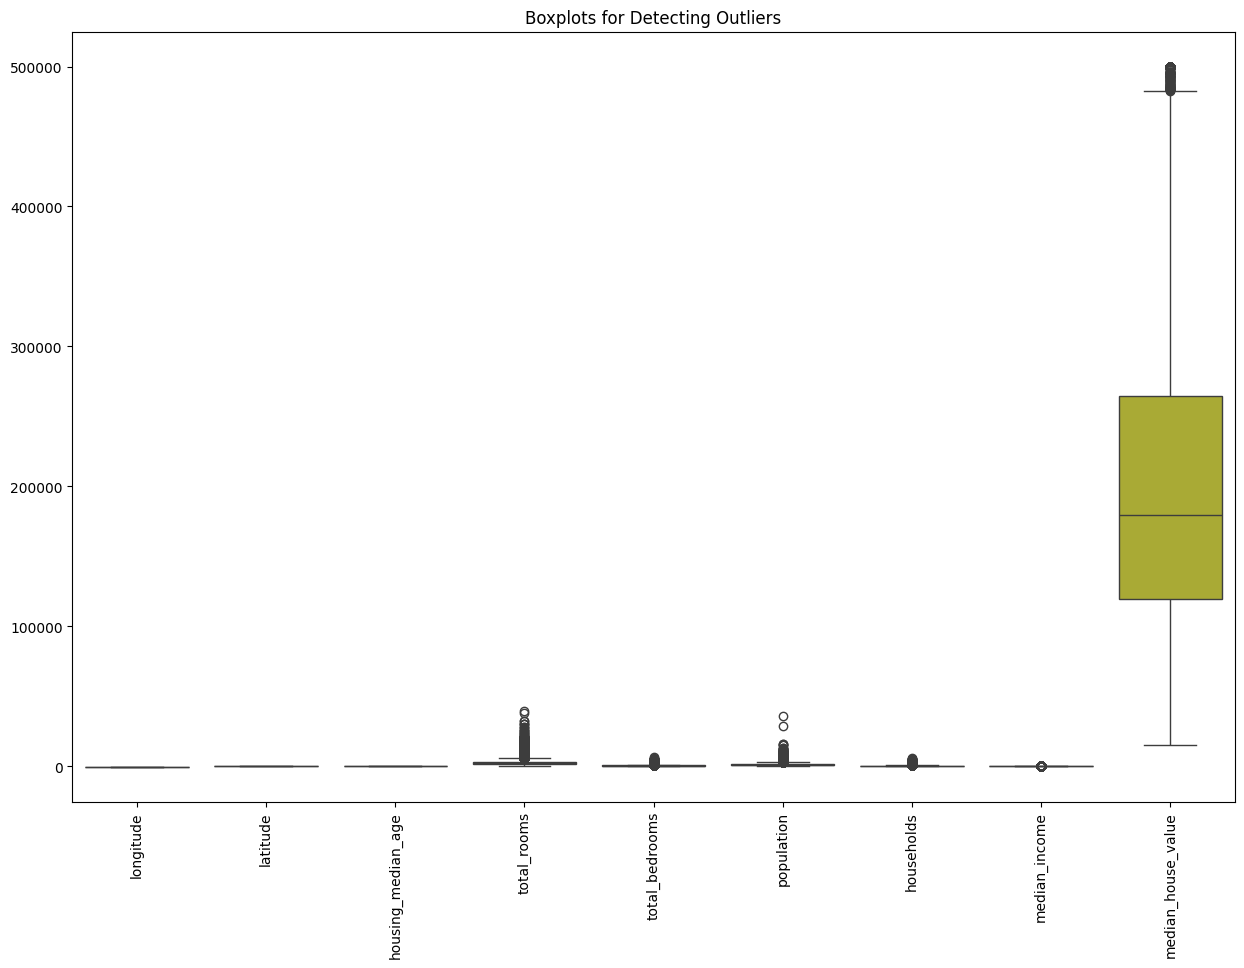

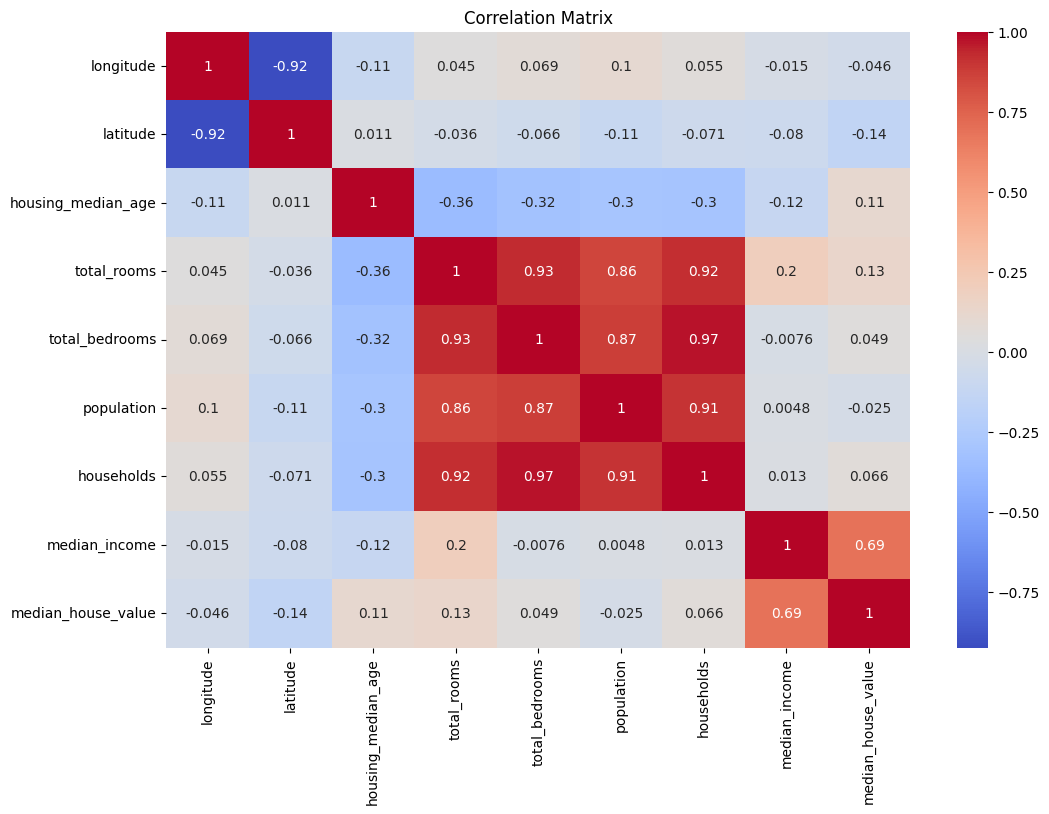

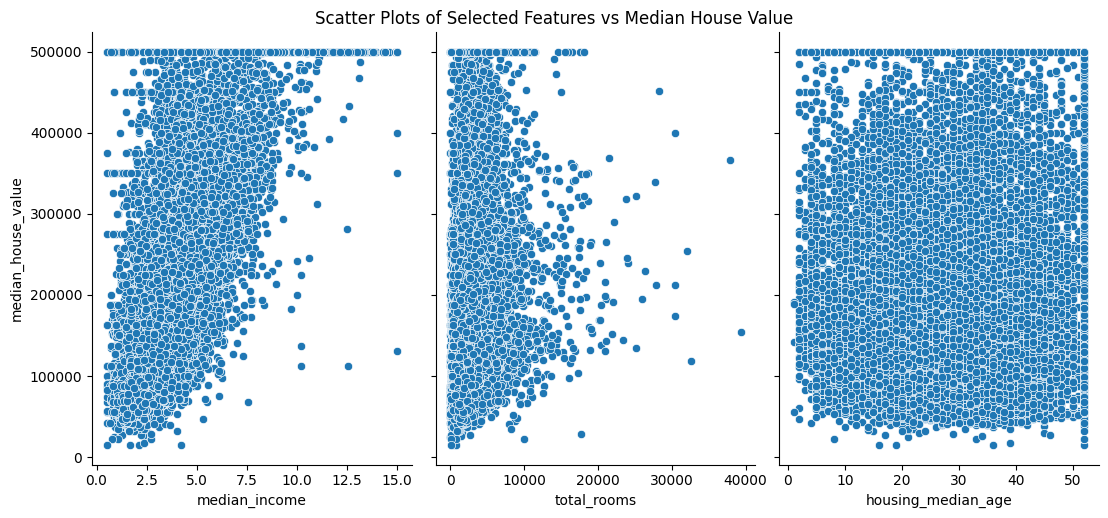

Mean Squared Error of the model: 6563178660.010066


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Load the Dataset
housing_df = pd.read_csv('housing.csv')
print("Dataset Loaded Successfully!")
print(housing_df.head())

# 2. Data Exploration and Cleaning
# Check for missing values
missing_values = housing_df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

# Handle missing values - fill missing 'total_bedrooms' with median
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)

# Get summary statistics
summary_stats = housing_df.describe()
print("\nSummary Statistics:\n", summary_stats)

# Visualize data distribution and identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=housing_df)
plt.xticks(rotation=90)
plt.title("Boxplots for Detecting Outliers")
plt.show()

# 3. Univariate and Bivariate Analysis
# Exclude the categorical column 'ocean_proximity' for correlation
numerical_df = housing_df.drop(columns=['ocean_proximity'])

# Correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plots to explore relationships with the target variable
sns.pairplot(housing_df, x_vars=['median_income', 'total_rooms', 'housing_median_age'], y_vars='median_house_value', height=5, aspect=0.75)
plt.suptitle("Scatter Plots of Selected Features vs Median House Value", y=1.02)
plt.show()

# 4. Modeling
# Prepare data - include 'ocean_proximity' as dummy variables
housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'], drop_first=True)

# Select features for modeling
X = housing_df[['median_income', 'total_rooms', 'housing_median_age']]  # You can add more features here
y = housing_df['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model: {mse}')